# Loan Prediction

## Importing Necessary Libraries

In [80]:
import pandas as pd
pd.set_option("display.max_columns",100)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

In [81]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

## Loading the Dataset

In [82]:
df = pd.read_csv("LoansTrainingSet.csv")

### EDA

In [83]:
df.sample(10)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
117194,7472c638-0a78-4690-afc7-d26ec3b0bbeb,6158dbd5-2b3e-45c0-bc9f-eab498661327,Fully Paid,99999999,Short Term,727.0,6 years,Home Mortgage,31330.0,Debt Consolidation,$472.56,12.5,64.0,5,0,3189,6977,0.0,0.0
133607,84e83445-81dd-4329-be9f-3a823c1b72ac,8deafc4f-9b4c-4632-8fc3-80d791fc2258,Fully Paid,99999999,Short Term,727.0,10+ years,Rent,79064.0,other,$790.64,19.2,21.0,13,0,3303,8405,0.0,0.0
61306,3cff27ee-9b7b-4798-af29-7672891a6f39,eab147dd-362e-48aa-a1c6-c8ae3d345d8f,Fully Paid,15565,Short Term,677.0,< 1 year,Rent,55589.0,Home Improvements,"$1,436.03",9.0,23.0,14,1,3401,19000,1.0,0.0
176854,afcc304a-d474-4a64-8ff5-794360d50dd9,c6f8b285-d868-4e94-a47e-47487a12c83c,Charged Off,11312,Short Term,730.0,3 years,Home Mortgage,51510.0,Debt Consolidation,$145.52,19.5,79.0,5,0,5993,11504,0.0,0.0
42049,29dc34fa-b3fe-4e32-ae83-967a228459b7,203c5856-5b0e-4a16-b067-0afd54247512,Charged Off,30637,Long Term,NaN,2 years,Own Home,NaN,Debt Consolidation,"$2,129.81",15.8,NaN,15,0,14036,15526,0.0,0.0
171929,aaf0a482-b7e9-4bb4-b72b-6a8549fa7e13,18d71d5c-77e7-475a-989b-f4e6aa775483,Fully Paid,6717,Short Term,724.0,6 years,Rent,45117.0,Debt Consolidation,"$1,026.41",7.7,26.0,11,0,4637,8023,0.0,0.0
209413,d06e3947-59b6-4f05-9de5-27195a3a0091,1de82251-6fa4-4a79-a3dd-39d03f6b0452,Fully Paid,31015,Short Term,748.0,2 years,Home Mortgage,181008.0,Debt Consolidation,"$2,926.30",13.9,8.0,14,0,15351,90301,0.0,0.0
142731,8df0d85c-bf7b-4257-91a3-08e98f950dea,96f794a4-5896-4b3b-b84f-c838b1dc1ec4,Fully Paid,14660,Short Term,735.0,10+ years,Home Mortgage,78184.0,Debt Consolidation,$185.69,13.5,54.0,8,0,7598,20702,0.0,0.0
4230,044936df-7cc4-4f00-990d-7a7cd9d98800,a89915b8-b53b-4073-8865-9842334d7625,Fully Paid,99999999,Long Term,693.0,7 years,Home Mortgage,75068.0,Debt Consolidation,$794.46,25.3,NaN,15,0,32620,53564,0.0,0.0
9470,097292e1-5fbf-4f74-bbf2-313fc98b0dca,ca9c7df9-35be-4da0-93a5-ae521fee56a9,Charged Off,3972,Short Term,7440.0,10+ years,Home Mortgage,79448.0,Debt Consolidation,$545.54,34.0,NaN,12,0,26210,52316,0.0,0.0


In [84]:
df.shape

(256984, 19)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [86]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [87]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,2.569840e+05,195308.000000,1.953080e+05,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,18.290195,34.881450,11.106267,0.156628,1.540656e+04,0.110316,0.027203
std,3.438131e+07,1762.016848,5.887757e+04,7.075747,21.854165,4.982982,0.460731,1.966506e+04,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.299000e+03,714.000000,4.432100e+04,13.500000,16.000000,8.000000,0.000000,5.974000e+03,0.000000,0.000000
50%,1.429800e+04,733.000000,6.124200e+04,17.000000,32.000000,10.000000,0.000000,1.107800e+04,0.000000,0.000000
75%,2.436700e+04,744.000000,8.646200e+04,21.700000,51.000000,14.000000,0.000000,1.931900e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


In [88]:
df.corr()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.139743,0.024069,0.014725,0.003488,-0.003094,-0.000062,0.003138,0.003576,-0.003069
Credit Score,-0.139743,1.000000,-0.033221,-0.011658,-0.007994,0.008124,0.000777,-0.003263,-0.003426,0.004381
Annual Income,0.024069,-0.033221,1.000000,0.146859,-0.059675,0.140463,-0.013672,0.292165,-0.044837,0.038185
Years of Credit History,0.014725,-0.011658,0.146859,1.000000,-0.039695,0.128033,0.061251,0.201001,0.062049,0.020915
Months since last delinquent,0.003488,-0.007994,-0.059675,-0.039695,1.000000,-0.035803,0.088612,-0.024292,0.112907,0.002730
Number of Open Accounts,-0.003094,0.008124,0.140463,0.128033,-0.035803,1.000000,-0.013731,0.222763,-0.022805,0.005754
Number of Credit Problems,-0.000062,0.000777,-0.013672,0.061251,0.088612,-0.013731,1.000000,-0.103814,0.755866,0.584917
Current Credit Balance,0.003138,-0.003263,0.292165,0.201001,-0.024292,0.222763,-0.103814,1.000000,-0.117995,-0.011118
Bankruptcies,0.003576,-0.003426,-0.044837,0.062049,0.112907,-0.022805,0.755866,-0.117995,1.000000,0.046160
Tax Liens,-0.003069,0.004381,0.038185,0.020915,0.002730,0.005754,0.584917,-0.011118,0.046160,1.000000


In [89]:
# correlation matrix ranking
abs(df.corr()["Credit Score"]).sort_values(ascending = False)

Credit Score                    1.000000
Current Loan Amount             0.139743
Annual Income                   0.033221
Years of Credit History         0.011658
Number of Open Accounts         0.008124
Months since last delinquent    0.007994
Tax Liens                       0.004381
Bankruptcies                    0.003426
Current Credit Balance          0.003263
Number of Credit Problems       0.000777
Name: Credit Score, dtype: float64

In [90]:
df["Loan Status"].value_counts()

Fully Paid     176191
Charged Off     80793
Name: Loan Status, dtype: int64

<AxesSubplot:ylabel='Density'>

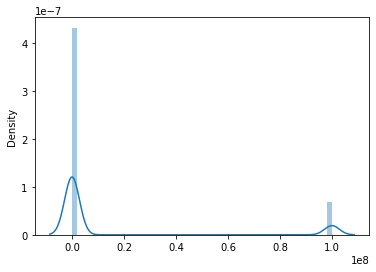

In [91]:
sns.distplot(x = df["Current Loan Amount"])

In [92]:
df["Term"].value_counts()

Short Term    192632
Long Term      64352
Name: Term, dtype: int64

<AxesSubplot:ylabel='Density'>

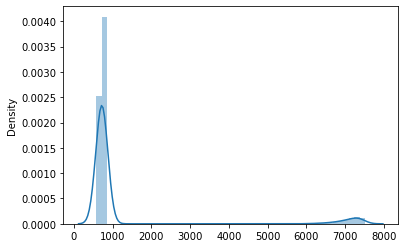

In [93]:
sns.distplot(x = df["Credit Score"])

In [94]:
df["Years in current job"].value_counts()

10+ years    78896
2 years      23462
< 1 year     21012
3 years      20659
5 years      17864
1 year       16746
4 years      16166
6 years      14597
7 years      13968
8 years      12206
9 years       9932
Name: Years in current job, dtype: int64

In [95]:
df["Home Ownership"].value_counts()

Home Mortgage    124477
Rent             109010
Own Home          22923
HaveMortgage        574
Name: Home Ownership, dtype: int64

<AxesSubplot:xlabel='Annual Income', ylabel='Density'>

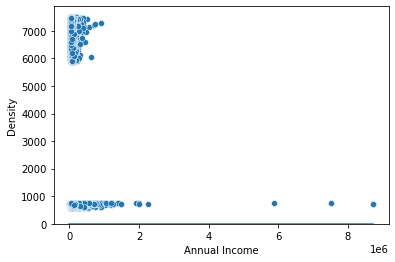

In [96]:
sns.scatterplot(x="Annual Income", y="Credit Score", data=df)

In [97]:
df["Purpose"].value_counts()

Debt Consolidation      203911
Home Improvements        14915
other                    14268
Other                     9667
Business Loan             4712
Buy a Car                 3276
Medical Bills             2868
Take a Trip               1570
Buy House                 1530
Educational Expenses       267
Name: Purpose, dtype: int64

In [98]:
df["Monthly Debt"].value_counts()

$0.00         254
$636.87        12
$847.85        12
$838.10        12
$679.66        12
             ... 
$452.15         1
$1,604.60       1
$422.57         1
$886.36         1
$1,076.32       1
Name: Monthly Debt, Length: 129115, dtype: int64

In [99]:
df["Years of Credit History"].value_counts()

16.0    3563
15.0    3379
17.0    3080
16.5    2963
14.0    2954
        ... 
54.7       1
61.8       1
54.6       1
55.3       1
53.0       1
Name: Years of Credit History, Length: 541, dtype: int64

In [100]:
df["Months since last delinquent"].value_counts()

12.0     2224
14.0     2196
15.0     2189
8.0      2164
9.0      2127
         ... 
114.0       1
133.0       1
116.0       1
119.0       1
115.0       1
Name: Months since last delinquent, Length: 131, dtype: int64

In [101]:
df["Number of Open Accounts"].value_counts()

9     24412
10    23306
8     23140
11    21577
7     20851
12    19056
6     17454
13    15987
14    13649
5     12232
15    10833
16     8982
17     7258
4      7225
18     5801
19     4706
20     3612
3      3362
21     2815
22     2207
23     1725
24     1371
2      1104
25     1011
26      746
27      580
28      404
29      303
30      236
31      207
32      181
33      113
34      104
35       79
36       61
37       58
38       41
1        37
39       33
40       26
41       24
42       14
43        9
45        9
47        7
0         5
44        5
76        4
46        3
48        3
50        3
53        3
52        2
55        2
58        2
49        1
51        1
54        1
56        1
Name: Number of Open Accounts, dtype: int64

In [102]:
df["Number of Credit Problems"].value_counts()

0     223171
1      29547
2       2987
3        791
4        275
5        125
6         42
7         16
8         12
9         10
10         6
11         2
Name: Number of Credit Problems, dtype: int64

In [103]:
df["Current Credit Balance"].value_counts()

0         1565
3420        32
6746        32
6259        30
6980        29
          ... 
18159        1
46833        1
35718        1
37765        1
122228       1
Name: Current Credit Balance, Length: 45704, dtype: int64

In [104]:
df["Maximum Open Credit"].value_counts()

0        1597
0         234
15662      19
11345      19
14770      19
         ... 
70440       1
63070       1
70445       1
19434       1
82886       1
Name: Maximum Open Credit, Length: 87188, dtype: int64

In [105]:
df["Bankruptcies"].value_counts()

0.0    229661
1.0     25605
2.0       957
3.0       180
4.0        33
5.0        15
6.0         3
7.0         1
Name: Bankruptcies, dtype: int64

In [106]:
df["Tax Liens"].value_counts()

0.0     252322
1.0       3276
2.0        872
3.0        247
4.0        124
5.0         61
6.0         30
9.0         10
8.0          8
7.0          6
10.0         3
11.0         2
Name: Tax Liens, dtype: int64

### Data Preparation

In [107]:
# we delete it because more than half of the data is lost
del df["Months since last delinquent"]

# we delete these two as they are unnecessary
print(df["Customer ID"].nunique())
del df["Customer ID"]
del df["Loan ID"]

215700


In [108]:
# If there is a duplicate row, we delete it
df.drop_duplicates(inplace = True)

In [109]:
# We fill 529 missing data with the mean
df["Bankruptcies"].fillna(df["Bankruptcies"].mean(), inplace = True)

In [110]:
# We fill in 23 missing data with the average
df["Tax Liens"].fillna(df["Tax Liens"].mean(), inplace = True)

In [112]:
# Since there are two things other and Other, we changed other to Other
df["Purpose"] = df["Purpose"].str.replace("other", "Other")

In [113]:
# We changed HaveMortgage to Home Mortgage because there are only 3 types
df["Home Ownership"] = df["Home Ownership"].str.replace("HaveMortgage", "Home Mortgage")

In [114]:
# We fill the empty maximum open credits with the median
df["Maximum Open Credit"] = df["Maximum Open Credit"].str.extract(r"(\d+)", expand=False).astype("float")
df["Maximum Open Credit"] = df["Maximum Open Credit"].fillna(df["Maximum Open Credit"].median())

In [115]:
# We removed the $ sign and ,
df["Monthly Debt"] = df["Monthly Debt"].str.replace("[\$]", '')
df["Monthly Debt"] = df["Monthly Debt"].str.replace("[\,]", '')
df["Monthly Debt"] = df["Monthly Debt"].astype("float")

In [116]:
# this is whether we give credit or not, we translate 0 and 1
df["Loan Status"] = df["Loan Status"].replace("Charged Off", 0).replace("Fully Paid", 1).astype("int")

In [117]:
# We fill 61676 missing data with median
df["Annual Income"] = df["Annual Income"].fillna(df["Annual Income"].median())

In [118]:
# Filling the empty years in current jobs with < 1 year
df["Years in current job"] =  df["Years in current job"].fillna("< 1 year")

In [119]:
# Filling empty credit scores with median
df["Credit Score"] =  df["Credit Score"].fillna(df["Credit Score"].median())

In [120]:
# We filled the values that are 99999999 with the median
fillValue = df[df["Current Loan Amount"] < 1.5e7]["Current Loan Amount"].median()
df["Current Loan Amount"] = df["Current Loan Amount"].apply(lambda x : fillValue if x >= 99999999 else x)

In [121]:
df["Years in current job"].value_counts(normalize = True)

10+ years    0.307708
< 1 year     0.125338
2 years      0.091408
3 years      0.080445
5 years      0.069721
1 year       0.065190
4 years      0.062977
6 years      0.056803
7 years      0.054386
8 years      0.047497
9 years      0.038527
Name: Years in current job, dtype: float64

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240374 entries, 0 to 256983
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan Status                240374 non-null  int32  
 1   Current Loan Amount        240374 non-null  float64
 2   Term                       240374 non-null  object 
 3   Credit Score               240374 non-null  float64
 4   Years in current job       240374 non-null  object 
 5   Home Ownership             240374 non-null  object 
 6   Annual Income              240374 non-null  float64
 7   Purpose                    240374 non-null  object 
 8   Monthly Debt               240374 non-null  float64
 9   Years of Credit History    240374 non-null  float64
 10  Number of Open Accounts    240374 non-null  int64  
 11  Number of Credit Problems  240374 non-null  int64  
 12  Current Credit Balance     240374 non-null  int64  
 13  Maximum Open Credit        24

In [123]:
df.sample(10)

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
245476,1,12150.0,Short Term,734.0,2 years,Own Home,61505.0,Other,946.69,29.5,7,1,7690,21798.5,1.0,0.0
68403,1,20302.0,Long Term,708.0,3 years,Home Mortgage,258851.0,Other,3127.78,21.7,17,0,233647,21798.5,0.0,0.0
147895,1,25383.0,Long Term,600.0,2 years,Rent,81224.0,Debt Consolidation,1468.80,15.3,10,0,10671,21798.5,0.0,0.0
247894,0,17857.0,Long Term,7260.0,7 years,Home Mortgage,73469.0,Debt Consolidation,1677.54,13.4,22,0,17759,21798.5,0.0,0.0
191325,1,5918.0,Short Term,731.0,10+ years,Home Mortgage,55233.0,Debt Consolidation,1063.23,55.6,9,0,18720,22102.0,0.0,0.0
35809,1,14780.0,Short Term,730.0,10+ years,Home Mortgage,118236.0,Debt Consolidation,958.70,20.9,11,0,14798,21798.5,0.0,0.0
117571,0,4795.0,Short Term,6860.0,10+ years,Home Mortgage,30123.0,Home Improvements,346.41,15.5,20,1,9390,21798.5,1.0,0.0
32039,0,19608.0,Short Term,721.0,6 years,Home Mortgage,78432.0,Debt Consolidation,843.14,8.5,10,0,16917,21798.5,0.0,0.0
141451,0,2013.0,Short Term,6970.0,< 1 year,Rent,9423.0,Other,191.60,10.2,4,0,1523,21798.5,0.0,0.0
59140,1,12025.0,Short Term,731.0,7 years,Home Mortgage,138586.0,Debt Consolidation,2101.88,4.7,8,0,2011,21798.5,0.0,0.0


In [124]:
# we convert x to dummy variable
x = pd.get_dummies(df, drop_first = True)
print(df.shape)

(240374, 16)


In [125]:
# we determine x and y
y = x["Loan Status"]
del x["Loan Status"]

In [126]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1, random_state = 13)

In [127]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((216336, 32), (24038, 32), (216336,), (24038,))

In [128]:
g = GaussianNB()
b = BernoulliNB()
k = KNeighborsClassifier()
log = LogisticRegression()
gbc = GradientBoostingClassifier()
r = RandomForestClassifier()
d = DecisionTreeClassifier()

In [129]:
g.fit(x_train, y_train)
b.fit(x_train, y_train)
k.fit(x_train, y_train)
log.fit(x_train, y_train)
gbc.fit(x_train, y_train)
r.fit(x_train, y_train)
d.fit(x_train, y_train)

DecisionTreeClassifier()

In [130]:
y_pred_g = g.predict(x_test)
y_pred_b = b.predict(x_test)
y_pred_k = k.predict(x_test)
y_pred_log = log.predict(x_test)
y_pred_gbc = gbc.predict(x_test)
y_pred_r = r.predict(x_test)
y_pred_d = d.predict(x_test)

In [131]:
print(accuracy_score(y_test, y_pred_g))
print(accuracy_score(y_test, y_pred_b))
print(accuracy_score(y_test, y_pred_k))
print(accuracy_score(y_test, y_pred_log))
print(accuracy_score(y_test, y_pred_gbc))
print(accuracy_score(y_test, y_pred_r))
print(accuracy_score(y_test, y_pred_d))

0.7919960063233215
0.7356269240369415
0.7559281138197853
0.7936184374739995
0.7993593476994758
0.8085947250187203
0.7249355187619603


In [132]:
print(precision_score(y_test, y_pred_g))
print(precision_score(y_test, y_pred_b))
print(precision_score(y_test, y_pred_k))
print(precision_score(y_test, y_pred_log))
print(precision_score(y_test, y_pred_gbc))
print(precision_score(y_test, y_pred_r))
print(precision_score(y_test, y_pred_d))

0.7919423006247703
0.7385804933394966
0.7925208714123401
0.7825701493860543
0.7926070569002316
0.8095980350479429
0.8207885304659498


In [133]:
print(recall_score(y_test, y_pred_g))
print(recall_score(y_test, y_pred_b))
print(recall_score(y_test, y_pred_k))
print(recall_score(y_test, y_pred_log))
print(recall_score(y_test, y_pred_gbc))
print(recall_score(y_test, y_pred_r))
print(recall_score(y_test, y_pred_d))

0.9734048560135516
0.9924336533032185
0.9058723884810841
0.9968379446640316
0.9855448898927159
0.9678147939017504
0.8016939582156973


In [134]:
print(f1_score(y_test, y_pred_g))
print(f1_score(y_test, y_pred_b))
print(f1_score(y_test, y_pred_k))
print(f1_score(y_test, y_pred_log))
print(f1_score(y_test, y_pred_gbc))
print(f1_score(y_test, y_pred_r))
print(f1_score(y_test, y_pred_d))

0.8733471807082426
0.8468932951068494
0.8454140647643138
0.8768034964861308
0.8786086431250157
0.8816645662405803
0.8111288848263254


In [135]:
print(confusion_matrix(y_test, y_pred_g))
print(confusion_matrix(y_test, y_pred_b))
print(confusion_matrix(y_test, y_pred_k))
print(confusion_matrix(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_gbc))
print(confusion_matrix(y_test, y_pred_r))
print(confusion_matrix(y_test, y_pred_d))

[[ 1799  4529]
 [  471 17239]]
[[  107  6221]
 [  134 17576]]
[[ 2128  4200]
 [ 1667 16043]]
[[ 1423  4905]
 [   56 17654]]
[[ 1761  4567]
 [  256 17454]]
[[ 2297  4031]
 [  570 17140]]
[[ 3228  3100]
 [ 3512 14198]]


### The best success rate was 88% in random forest classiffier.